# HW3 (20')

## Submit as an HTML or PDF file

Print your name (First Name and Last Name) below

In [1]:
print('my name is Liping Chen')

my name is Liping Chen


- Import the `numpy` and `matplotlib` packages and rename them to their alias.
- Import `scipy` (no renaming).

In [7]:
# Write your own code
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats 

## (a) Compute a probability mass function for Poisson distribution with a parameter $\lambda$. 

$P(X=k) = \lambda^k \exp(-\lambda)/k!$, where $k\in\mathbb{N}_0$

Calculate $P(X=k)$ when
- $\lambda=1.5$
- $k=5$

To get full points:
- First define each of these input variables and assign them with pre-specified values **(1')**
- For the factorial, you can use `np.arange()` and `np.prod()` **(1')**
- Define `P_val` and write the formula above **(1')**
- Use the built-in function `scipy.stats.poisson.pmf()` to compute the pmf, denoted as `P_scipy_val` **(1')**
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html 
- Print two results together **(1')**

In [11]:
# lambda_val = rate parameter of the Poisson distribution
# Notice that lambda itself is a reserved keyword in Python, so we need to come up with a different name.
# k_val is the input, which takes values from the entire natural number set. 
# here we calculate a particular option when k_val=5.
# P_val = ...
# Use built-in function to compute the PMF, denoted as P_scipy
# P_scipy_val = ...
# Write your own code

lam = 1.5
k = 5
factorial_k = np.prod(np.arange(1, k+1))  
P_val = (lam**k * np.exp(-lam)) / factorial_k
print("1.",P_val)

P_scipy_val = stats.poisson.pmf(k, lam)
print("2.", P_scipy_val)



1. 0.014119955446892825
2. 0.014119955446892832


## (b) Composite operations on arrays

<font color='red'> **To develop a good naming habit, I recommend you add the type information to the name of the variable. For example, if it is a scalar, you can add `_val`; if it is a vec, you can add `_vec`; if it is a matrix, you can add `_mat`, if it is a boolean, you can add `_bool`, etc.** </font>

- Define `r_val` as 0.06
- Define two arrays $a$ and $t$ using `np.array()`, renaming them as `a_vec` and `t_vec`, assigning the following values: **(1')**

$ a = \begin{pmatrix} a_0 \\ a_1 \\ a_2 \end{pmatrix} = \begin{pmatrix} 20 \\ 30 \\ 15 \end{pmatrix}, \qquad t = \begin{pmatrix} t_0 \\ t_1 \\ t_2 \end{pmatrix} = \begin{pmatrix} 0 \\ 1 \\ 2 \end{pmatrix} $

- Use element-by-element vector operations to compute a new array `m_vec` of length 3 as follows: **(1')** <br>

$ m = \begin{pmatrix} a_0 / (1+r)^{t_0} \\ a_1 / (1+r)^{t_1} \\ a_2 / (1+r)^{t_2} \end{pmatrix} $

- Compute the sum of the values of $m$ **(1')**
    - You can either use `np.sum()` or `m_vec.sum()`.
    - I am using subscripts to denote the individual elements of $a$ and $t$. In the code just enter the values of $a$ and $t$.

- Compute the inner product (or Euclidean distance) of `m_vec` manually.
- $||m||_2 = \sqrt{m^\top * m}$, where $^\top$ is the transpose operator, and $*$ is the matrix operator (not element-wise multiplication).
  - You can use `^T` to compute transpose or use `np.transpose()`. **(1')**
  - You can use `@` to perform matrix multiplication or use `np.matmul()`. Make sure the dimension is correct. **(1')**
  - Use `np.sqrt()` to compute the square root.
  - Print out your final result and compare it to the built-in function `np.linalg.norm(m_vec, ord=2)`.


In [20]:
# Write your own code
r_val = 0.06
a_vec = np.array([20,30,15],dtype = float)
t_vec = np.array([0,1,2],dtype = float)
m_vec = a_vec / (1 + r_val)**t_vec
sum_m = np.sum(m_vec)
print("m_vec=" , m_vec)
print("sum(m) =", sum_m)

inner_m = np.transpose(m_vec) @ m_vec  
norm_manual = np.sqrt(inner_m)
norm_builtin = np.linalg.norm(m_vec, ord=2)
print("||m||_2 (manual) =", norm_manual)
print("||m||_2 (np.linalg.norm) =", norm_builtin)
print("norm_manual is equal to norm_builtin", norm_manual == norm_builtin)

m_vec= [20.         28.30188679 13.3499466 ]
sum(m) = 61.65183339266643
||m||_2 (manual) = 37.13782263732448
||m||_2 (np.linalg.norm) = 37.13782263732448
norm_manual is equal to norm_builtin True


## (c) Plot a standard student-t random vector

To get full points:

- Observe the naming tradition mentioned above.
- Set a seed with a number `612`. **(1')**
- Define parameters and sample size and assign them to pre-specified values ahead of time.
    - `df=1` and `size = 1000`.
    - When degree of freedom (`df`) is 1, the student-t distribution is also known as a Cauchy distribution.
        - It does not have a valid mean nor variance. (You will have a clearer idea when you see the histogram!)
    - Use `ny.random.standard_t()` to generate random samples from standard student-t distributions. **(1')**
- Create a histogram plot **(1')**
    - Change the default color to `skyblue`. **(1')**
    - Label the x, y axes and title properly. **(1')**
    - **Optional**: You can change the number of `bins` in the `plt.hist()` function to obtain a granular view of the histogram. 

Text(0.5, 1.0, 'Student Distribution')

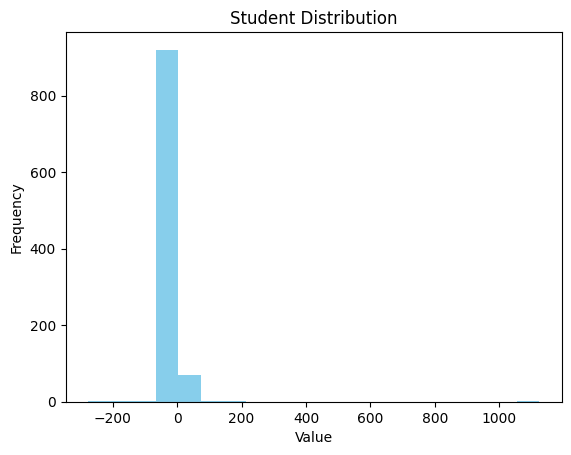

In [28]:
# Write your own code
np.random.seed(612)
df_val = 1     
size_val = 1000
t_vec = np.random.standard_t(df=df_val, size=size_val)

plt.hist( t_vec, bins=20,color="skyblue")

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Student Distribution")

## (d) Checking whether word is part of list

- Define a variable `disease_type_str` with the value **"Phobic anxiety disorders"** **(1')**
- Define a list of anxiety types `anxiety_ls` with names from the following link: **(1')**
    - https://www.icd10data.com/ICD10CM/Codes/F01-F99/F40-F48
    - This is the code for diagnoses related to mental health, specifically anxiety, dissociative, stress-related, somatoform, and other nonpsychotic mental disorders.
    - Do not copy the codes!
- Use `anxiety_ls.index()` function to export and print out the location of **"Somatoform disorders"** **(1')** 
- Write an expression to test whether `disease_type_str` is contained in `anxiety_ls` and store the result in a variable `result_bool_1` **(1')**
- Change `disease_type_str` to **"Manic episode"** and replicate the above step with another resulting variable `result_bool_2` **(1')**

To get full points run all of the above commands

In [30]:
# Write your own code
disease_type_str = "Phobic anxiety disorders"
anxiety_ls = [
    "Phobic anxiety disorders",
    "Other anxiety disorders",
    "Obsessive-compulsive disorder",
    "Somatoform disorders"]
idx_val = anxiety_ls.index("Somatoform disorders")
print("Index of Somatoform disorders =", idx_val)
result_bool_1 = disease_type_str in anxiety_ls
print("Is disease_type_str in list?", result_bool_1)


disease_type_str = "Manic episode"
result_bool_2 = disease_type_str in anxiety_ls
print("Is new disease_type_str in list?", result_bool_2)


Index of Somatoform disorders = 3
Is disease_type_str in list? True
Is new disease_type_str in list? False


## (e) Classifying the anxiety level based on GAD-7 evaluation

Generalized Anxiety Disorder can be evaluated using a 7-item questionnaire (GAD-7) with a total score ranging from 0 to 21, where higher scores indicate more severe anxiety. 
- The score levels are generally interpreted as
    - 0-4: Minimal
    - 5-9: Mild
    - 10-14: Moderate
    - 15-21: Severe
- A score >= 10 suggested a potential diagnosis of GAD, warranting further clinical evaluation or intervention.
- You can find more details here: https://adaa.org/sites/default/files/GAD-7_Anxiety-updated_0.pdf.
- Define a new variable `gad7_val` and assign the value to 6, 12, and 20. 
- Write an `if/elif/else` statement that prints out the corresponding ordinal level for the above three numerical values. **(2')**
- Since we haven't covered functions yet, when you change `gad7_val` to a new value, you need to copy your existing control flow codes and reun them in a new code chunk. I provide three empty code chunks below for you to work on each scenario. **(3')** Each scenario's output counts as 1 point.

In [34]:
# Write your own code
gad7_val = 6
if gad7_val <= 4:
    print("Minimal anxiety")
elif gad7_val <= 9:
    print("Mild anxiety")
elif gad7_val <= 14:
    print("Moderate anxiety")
else:
    print("Severe anxiety")

Mild anxiety


In [35]:
# Write your own code
# Change you gad7_val and rerun the code
gad7_val = 12
if gad7_val <= 4:
    print("Minimal anxiety")
elif gad7_val <= 9:
    print("Mild anxiety")
elif gad7_val <= 14:
    print("Moderate anxiety")
else:
    print("Severe anxiety")

Moderate anxiety


In [36]:
# Write your own code
# Change you gad7_val and rerun the code
gad7_val = 20
if gad7_val <= 4:
    print("Minimal anxiety")
elif gad7_val <= 9:
    print("Mild anxiety")
elif gad7_val <= 14:
    print("Moderate anxiety")
else:
    print("Severe anxiety")

Severe anxiety
